# Citi Bike: Business or Pleasure?
By Wilson Alexei, Carlos Mesquita, and Lize-Alet Morkel

![Citi Bike Logo](images/citibike_logo.png)

## Introduction
Citi Bike is a popular bike-sharing service in New York City, Hoboken, and Jersey City that allows users the flexibility of having a bike at their disposal whenever they need it without the hassle of bike storage and maintenance. The service offers memberships for frequent users and also has pricing for those one-time users visiting the area to ride around and explore.

Given that bike and scooter shares are becoming more common, especially in urban areas, we wanted to analyze the who, when, where, and how of the Citi Bike service to see if it was being used more for business purposes like commuting or more by leisurely users looking to have some fun.

## Data Source
The dataset used was the official Citi Bike data available at https://ride.CitiBikenyc.com/system-data. The dataset provides insight into the usage of Citi Bike in the Hoboken and Jersey City area for a period of 12 months from December 2021 to November 2022.

### Data Dictionary

| Feature Name | Definition | Key | Data Type |
|--------------|------------|-----| --------- |
| ride_id | _Unique ID for ride identification_ | ... | object |
| rideable_type | _Type of bike_ | __classic_bike = Tradational Bike, electric_bike = E-Bike, docked_bike =unknown__ | object |
| started_at | _Day and time ride started_ | ... | object |
| ended_at | _Day and time ride ended_ | ... | object |
| start_station_name | _Name of the starting station_ | ... | object |
| start_station_id | _Unique ID of the starting station_ | ... | object |
| end_station_name | _Name of the ending station_ | ... | object |
| end_station_id | _Unique ID of the ending station_ | ... | object |
| start_lat | _Latitude of the starting station_ | ... | float64 |
| start_lng | _Longitude of the starting station_ | ... | float64 |
| end_lat | _Latitude of the ending station_ | ... | float64 |
| end_lng | _Longitude of the ending station_ | ... | float64 |
| member_casual | _Membership type of the rider_ | __member = Membership, casual = No membership__ | object |

### Read Data from Files

First we must import the packages that we will need to conduct our analysis. We will need `pathlib` and `os` to help read the csv files more easily. `pandas` and `numpy` we will use to manipulate the data. Finally, `folium`, `matplotlib`, and `seaborn` will aid in the creation of our visualizations.

In [52]:
### Imports
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import folium
import matplotlib.pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = True
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### Initial Data Review

Before reading the data from each of the 12 files, we will read from one file to see how many columns we are working with and what data types the data in the columns are assigned.

In [53]:
### Test one file
filepath = "dataset/JC-202202-citibike-tripdata.csv"
df_test = pd.read_csv(filepath)
print("Done", os.path.basename(filepath))
print(df_test.info())
df_test.head()

Done JC-202202-citibike-tripdata.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31911 entries, 0 to 31910
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             31911 non-null  object 
 1   rideable_type       31911 non-null  object 
 2   started_at          31911 non-null  object 
 3   ended_at            31911 non-null  object 
 4   start_station_name  31911 non-null  object 
 5   start_station_id    31911 non-null  object 
 6   end_station_name    31795 non-null  object 
 7   end_station_id      31795 non-null  object 
 8   start_lat           31911 non-null  float64
 9   start_lng           31911 non-null  float64
 10  end_lat             31836 non-null  float64
 11  end_lng             31836 non-null  float64
 12  member_casual       31911 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.2+ MB
None


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B7BCBC133222B04A,classic_bike,2022-02-17 11:48:16,2022-02-17 11:58:30,Astor Place,JC077,Journal Square,JC103,40.719282,-74.071262,40.733670,-74.062500,member
1,0F9F1A0F18FD3A22,electric_bike,2022-02-02 08:31:26,2022-02-02 08:38:08,Astor Place,JC077,Sip Ave,JC056,40.719282,-74.071262,40.730897,-74.063913,member
2,44B5D106DDB509AC,electric_bike,2022-02-09 14:05:49,2022-02-09 14:10:21,Astor Place,JC077,Sip Ave,JC056,40.719282,-74.071262,40.730897,-74.063913,member
3,E1434F258C195DC6,classic_bike,2022-02-08 07:57:44,2022-02-08 08:15:26,Astor Place,JC077,Sip Ave,JC056,40.719282,-74.071262,40.730897,-74.063913,member
4,64821879B2659E35,classic_bike,2022-02-07 08:05:28,2022-02-07 08:24:03,Astor Place,JC077,Sip Ave,JC056,40.719282,-74.071262,40.730897,-74.063913,member


The data appears to have 13 columns which are a mix of categorical and continuous data types.

Now that we have performed an initial analysis to understand the format of the data in one file, we can read from all 12 files.

In [54]:
### Combine all files

### Get all files in directory with .csv extension
path = "dataset"
files = Path(path).glob('*.csv')

### Create empty list to store data frames
dfs = []
### Iterate through files and read each csv as and convert to a data frame
for f in files:
    with open(f): ### open file
        try :
            dfs.append(pd.read_csv(f)) ### Read file, convert to data frame, and add to list
        except Exception as e:
            raise e
        print(os.path.basename(f), "Done") ### Indicate that the file was successfully processed

### Validate Output
try : 
    assert len(dfs) == 12, "More than 12 files were read."
except Exception as e:
        raise e

### Combine the separate data frames into one data frame
df_original = pd.concat(dfs)

print("{} files were combined.".format(len(dfs)))

JC-202112-citibike-tripdata.csv Done
JC-202201-citibike-tripdata.csv Done
JC-202202-citibike-tripdata.csv Done
JC-202203-citibike-tripdata.csv Done
JC-202204-citibike-tripdata.csv Done
JC-202205-citibike-tripdata.csv Done
JC-202206-citibike-tripdata.csv Done
JC-202207-citbike-tripdata.csv Done
JC-202208-citibike-tripdata.csv Done
JC-202209-citibike-tripdata.csv Done
JC-202210-citibike-tripdata.csv Done
JC-202211-citibike-tripdata.csv Done
12 files were combined.


After combining all 12 files, one for each month, let's explore the entire data set we will be working with.

In [55]:
### Explore data
df_original.info()
df_original.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894921 entries, 0 to 72708
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             894921 non-null  object 
 1   rideable_type       894921 non-null  object 
 2   started_at          894921 non-null  object 
 3   ended_at            894921 non-null  object 
 4   start_station_name  894911 non-null  object 
 5   start_station_id    894911 non-null  object 
 6   end_station_name    891566 non-null  object 
 7   end_station_id      891566 non-null  object 
 8   start_lat           894921 non-null  float64
 9   start_lng           894921 non-null  float64
 10  end_lat             892888 non-null  float64
 11  end_lng             892888 non-null  float64
 12  member_casual       894921 non-null  object 
dtypes: float64(4), object(9)
memory usage: 95.6+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,87F1811D08BA7BF3,classic_bike,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,JC009,Grove St PATH,JC005,40.727596,-74.044247,40.719586,-74.043117,member
1,48390A4B390ABD36,electric_bike,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,JC009,Hilltop,JC019,40.727596,-74.044247,40.731169,-74.057574,casual
2,93AE14B47CBB30F8,classic_bike,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,JC023,Brunswick St,JC023,40.724176,-74.050656,40.724176,-74.050656,casual
3,5D0BDBFB30D7C9F6,electric_bike,2021-12-11 03:25:41,2021-12-11 03:31:16,Brunswick St,JC023,Baldwin at Montgomery,JC020,40.724176,-74.050656,40.723659,-74.064194,member
4,D6382ADAF1672DD8,classic_bike,2021-12-17 10:59:28,2021-12-17 11:12:41,Brunswick St,JC023,Paulus Hook,JC002,40.724176,-74.050656,40.714145,-74.033552,casual


The files appear to have been formatted in the same way as no additional columns were added from our initial exploration of one file. We can now move on to cleaning our data.

## Data Cleanup

### Filter
First we will create a new data frame with only the features that we will be using in our analysis.

In [56]:
### Create new data frame with only the columns of interest
df = df_original[["ride_id", "started_at", "ended_at", "start_station_name", "end_station_name", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual"]]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894921 entries, 0 to 72708
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             894921 non-null  object 
 1   started_at          894921 non-null  object 
 2   ended_at            894921 non-null  object 
 3   start_station_name  894911 non-null  object 
 4   end_station_name    891566 non-null  object 
 5   start_lat           894921 non-null  float64
 6   start_lng           894921 non-null  float64
 7   end_lat             892888 non-null  float64
 8   end_lng             892888 non-null  float64
 9   member_casual       894921 non-null  object 
dtypes: float64(4), object(6)
memory usage: 75.1+ MB


,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual
3,5D0BDBFB30D7C9F6,2021-12-11 03:25:41,2021-12-11 03:31:16,Brunswick St,Baldwin at Montgomery,40.724176,-74.050656,40.723659,-74.064194,member
4,D6382ADAF1672DD8,2021-12-17 10:59:28,2021-12-17 11:12:41,Brunswick St,Paulus Hook,40.724176,-74.050656,40.714145,-74.033552,casual


The new data frame only contains the 10 columns that we will be using in our analysis. This will make our further manipulation of the dataset more manageable. The number of rows of data has remained the same for now.

### Convert Data Types
Some of the data types need to be converted so we can better utilize them in our analysis. Specifically, the `started_at` and `ended_at` columns must be converted to dates rather than strings.

In [57]:
### Convert times to datetime type
df = df.astype({'started_at':'datetime64', 'ended_at':'datetime64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894921 entries, 0 to 72708
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             894921 non-null  object        
 1   started_at          894921 non-null  datetime64[ns]
 2   ended_at            894921 non-null  datetime64[ns]
 3   start_station_name  894911 non-null  object        
 4   end_station_name    891566 non-null  object        
 5   start_lat           894921 non-null  float64       
 6   start_lng           894921 non-null  float64       
 7   end_lat             892888 non-null  float64       
 8   end_lng             892888 non-null  float64       
 9   member_casual       894921 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 75.1+ MB


Now that those columns have been converted to the datetime64 type, we can utilize datetime methods to extract certain elements from the values in these columns.

### Missing Data
Next, we must explore the dataset to see how much data is missing. First, we will explore how many values in each column are actually missing, meaning there is not value in the cell.

In [58]:
### Calculate percentage of missing rows per column
num_missing_rows = df.isna().any(axis=1).sum()
print(num_missing_rows, "rows contain missing values\n")
print("Percentage of Missing Values Per Column")
print(df.isna().mean().round(4)* 100)

3355 rows contain missing values

Percentage of Missing Values Per Column
ride_id               0.00
started_at            0.00
ended_at              0.00
start_station_name    0.00
end_station_name      0.37
start_lat             0.00
start_lng             0.00
end_lat               0.23
end_lng               0.23
member_casual         0.00
dtype: float64


It appears that most of the columns are complete, with the exception of 3. Because the percentage of missing rows for the columns with missing values is less than 50% we will drop the rows with missing values.

In [59]:
### Drop missing rows in data frame
df.dropna(inplace=True)

### Check that the rows were dropped
print("Percentage of Missing Values Per Column")
df.isna().mean().round(4)* 100

Percentage of Missing Values Per Column


ride_id               0.0
started_at            0.0
ended_at              0.0
start_station_name    0.0
end_station_name      0.0
start_lat             0.0
start_lng             0.0
end_lat               0.0
end_lng               0.0
member_casual         0.0
dtype: float64

Analyzing the dataset after dropping the rows with missing values confirms that we now have no rows with missing values in the dataset.

### New Features
We must create some new columns in the dataset to support our analysis. First, we will create a new column to store how long each ride lasted.

#### Ride Duration
In order to determine how long a ride was, we will use the starting time and ending time and find the difference between the two values. We will convert this difference to minutes rather than seconds when we store it in the new column.

In [60]:
### Calculate ride duration using start and ending time
df['ride_duration_mins'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]')
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member,6.0
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual,8.0
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual,7.0
3,5D0BDBFB30D7C9F6,2021-12-11 03:25:41,2021-12-11 03:31:16,Brunswick St,Baldwin at Montgomery,40.724176,-74.050656,40.723659,-74.064194,member,5.0
4,D6382ADAF1672DD8,2021-12-17 10:59:28,2021-12-17 11:12:41,Brunswick St,Paulus Hook,40.724176,-74.050656,40.714145,-74.033552,casual,13.0


We now have a column with the duration of each ride. Let's explore this column to see how the ride durations are distributed.

In [61]:
df['ride_duration_mins'].describe()

count    891566.000000
mean         13.362488
std          82.454503
min         -56.000000
25%           4.000000
50%           7.000000
75%          12.000000
max       28541.000000
Name: ride_duration_mins, dtype: float64

It appears that there are some values in our new column that are negative which does not seem logical as the values represent ride duration. This could be due to an issue with the way the data was recorded. Citi Bike notes that the dataset should only include rides of length greater than 0 seconds, so we will remove all rows where the ride duration was negative or 0 seconds.

In [62]:
### Store old number of rows to see how many rides were dropped
old_shape = df.shape[0]

### Remove any rides which have negative or zero ride time
df.drop(df.loc[df['ride_duration_mins'] <= 0].index, inplace=True)

### Number of inaccurate rides dropped
print(old_shape - df.shape[0], "rows dropped")
print(df.shape[0], "rows remain")

152853 rows dropped
738713 rows remain


Now lets look at the same column again to see how ride durations are distributed.

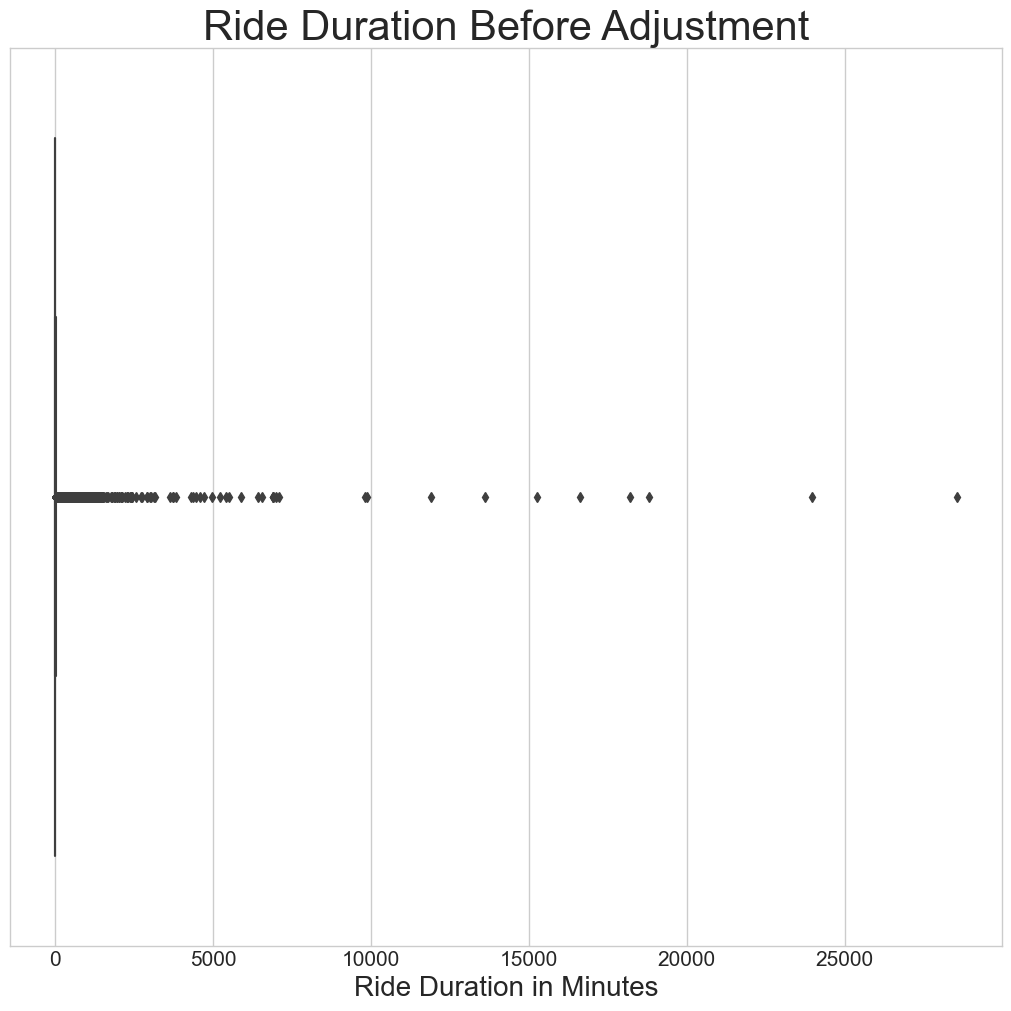

In [63]:
### Before Adjustment

fig, axs = plt.subplots(figsize = (10,10))

### Ride count by day of week over year
sns.boxplot(data=df, x='ride_duration_mins', ax=axs)
axs.set_title("Ride Duration Before Adjustment", fontsize=30)
axs.set_xlabel('Ride Duration in Minutes', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)

plt.show()

There are a number of rides that took longer than 24 hours. This may be due to a bike not being docked back in the station properly which could mean it was abandoned or stolen. Let's correct for these outliers and reanalyze the distribution.

In [64]:
### Adjust for Outliers

### Calculate interquartile range
q1 =  np.quantile(df['ride_duration_mins'], 0.25)
q3 =  np.quantile(df['ride_duration_mins'], 0.75)
iqr = q3-q1

### Use interquartile range to calculate lower and upper bounds
bound_low = q1 - 1.5 * iqr
bound_up = q3 + 1.5 * iqr

### Replace any low outliers with the lower bound and any high outliers with the upper bound
df['ride_duration_mins'] = np.where(df['ride_duration_mins'] > bound_up, bound_up, df['ride_duration_mins'])
df['ride_duration_mins'] = np.where(df['ride_duration_mins'] < bound_low, bound_low, df['ride_duration_mins'])

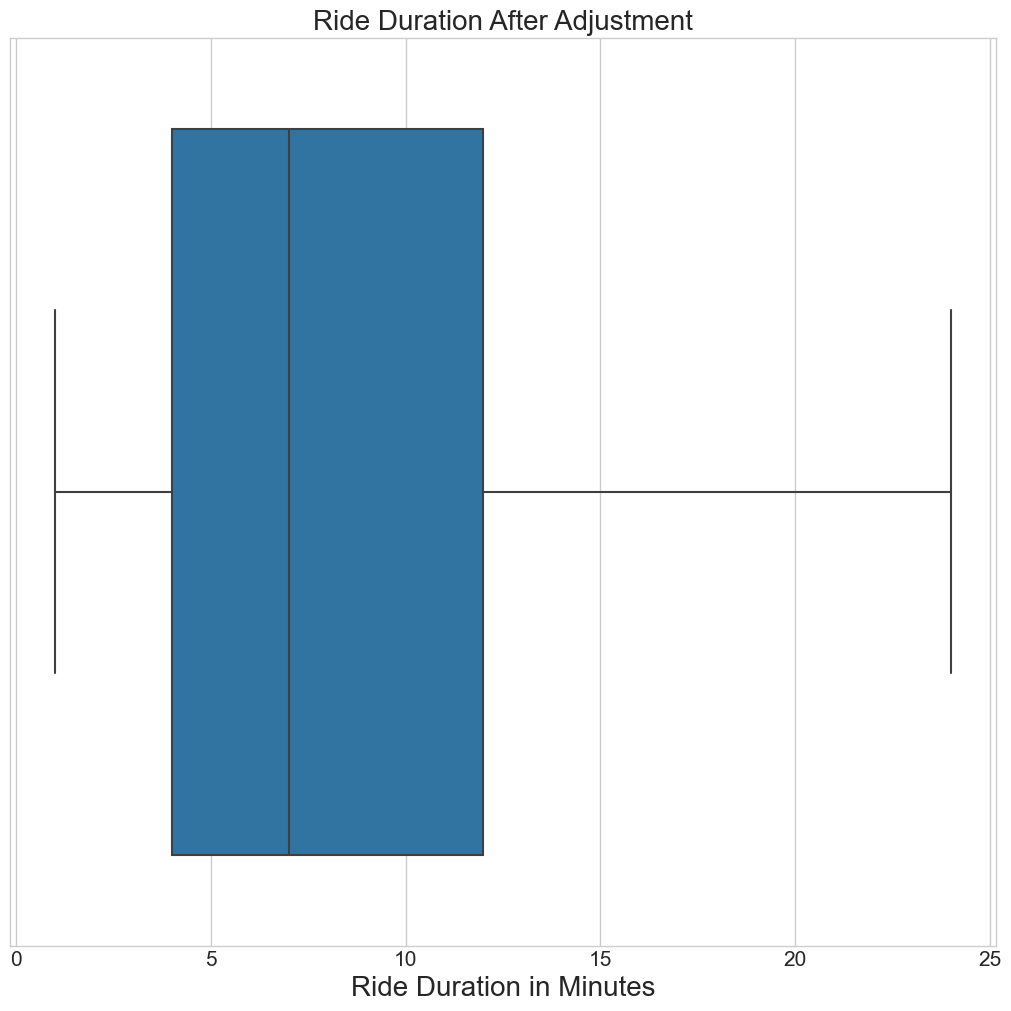

In [65]:
### After Adjustment
fig, axs = plt.subplots(figsize = (10,10))

### Ride count by day of week over year
sns.boxplot(data=df, x='ride_duration_mins', ax=axs)
axs.set_title("Ride Duration After Adjustment", fontsize=20)
axs.set_xlabel('Ride Duration in Minutes', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)

plt.show()

After removing the outliers, the data seems more appropriately distributed for our analysis. We can see that most users are using Citi Bike for between 4 and 12 minutes with a median ride time of about 7 minutes. The longest ride was about 24 minutes and the shortest ride was about 1 minute.

#### Date Features

In order to analyze the frequency of Citi Bike usage, we will need to create some new features from the starting and ending times so they can be utilized in future analysis.

Fist, we will separate the week number, day of the week, and starting hour from the starting time

In [66]:
### Determine week number
df['week_num'] = df["started_at"].dt.isocalendar().week
### Determine day of week
df['day_of_week'] = df["started_at"].dt.strftime('%a')
### Extract start time hour
df['start_hour'] = df["started_at"].dt.strftime('%H')
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins,week_num,day_of_week,start_hour
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member,6.0,49,Sun,09
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual,8.0,49,Tue,20
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual,7.0,52,Fri,16
5,FB33E9088D3EFB56,2021-12-03 15:55:17,2021-12-03 16:00:43,Marshall St & 2 St,Hoboken Terminal - Hudson St & Hudson Pl,40.740802,-74.042521,40.735938,-74.030305,casual,5.0,48,Fri,15
6,93C0CF266A05FB3A,2021-12-10 21:12:58,2021-12-10 21:18:45,Newark Ave,Brunswick & 6th,40.721525,-74.046305,40.726012,-74.050389,casual,5.0,49,Fri,21


Then, we will determine whether the day was a weekday (_Monday, Tuesday, Wednesday, Thursday, Friday_) or a weekend (_Saturday, Sunday_)

In [67]:
### Determine if ride occurred on weekday or weekend
df['weekday_weekend'] = np.where(df["started_at"].dt.dayofweek < 5, "weekday", "weekend")
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins,week_num,day_of_week,start_hour,weekday_weekend
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member,6.0,49,Sun,09,weekend
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual,8.0,49,Tue,20,weekday
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual,7.0,52,Fri,16,weekday
5,FB33E9088D3EFB56,2021-12-03 15:55:17,2021-12-03 16:00:43,Marshall St & 2 St,Hoboken Terminal - Hudson St & Hudson Pl,40.740802,-74.042521,40.735938,-74.030305,casual,5.0,48,Fri,15,weekday
6,93C0CF266A05FB3A,2021-12-10 21:12:58,2021-12-10 21:18:45,Newark Ave,Brunswick & 6th,40.721525,-74.046305,40.726012,-74.050389,casual,5.0,49,Fri,21,weekday


Finally, we will determine which season each ride occurred in. Meteorologist typically break up the year into periods of 3 months when analyzing the seasonality. Each season will be defined based on this breakdown:

| Season | Months |
| ------ | ------ |
| Spring | _March, April, May_ |
| Summer | _June, July, August_ |
| Fall   | _September, October, November_ |
| Winter | _December, January, February_ |

In [68]:
### Assign season to each ride.
def set_season(date) -> str:
    '''
    Determine the season each date occurred in
    ---
    INPUT:
    + date (datetime): Date of event.
    ---
    OUTPUT:
    + (str): String value representing season.
    '''
    date = int(date)
    if date in [3,4,5]:
        return "spring"
    elif date in [6,7,8]:
        return "summer"
    elif date in [9,10,11]:
        return "fall"
    elif date in [12,1,2]:
        return "winter"
    else:
        return np.NaN

df['season'] = df["started_at"].dt.strftime('%m').apply(set_season)
df.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_mins,week_num,day_of_week,start_hour,weekday_weekend,season
0,87F1811D08BA7BF3,2021-12-12 09:16:59,2021-12-12 09:23:08,Hamilton Park,Grove St PATH,40.727596,-74.044247,40.719586,-74.043117,member,6.0,49,Sun,09,weekend,winter
1,48390A4B390ABD36,2021-12-07 20:06:14,2021-12-07 20:14:14,Hamilton Park,Hilltop,40.727596,-74.044247,40.731169,-74.057574,casual,8.0,49,Tue,20,weekday,winter
2,93AE14B47CBB30F8,2021-12-31 16:07:10,2021-12-31 16:14:39,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,casual,7.0,52,Fri,16,weekday,winter
5,FB33E9088D3EFB56,2021-12-03 15:55:17,2021-12-03 16:00:43,Marshall St & 2 St,Hoboken Terminal - Hudson St & Hudson Pl,40.740802,-74.042521,40.735938,-74.030305,casual,5.0,48,Fri,15,weekday,winter
6,93C0CF266A05FB3A,2021-12-10 21:12:58,2021-12-10 21:18:45,Newark Ave,Brunswick & 6th,40.721525,-74.046305,40.726012,-74.050389,casual,5.0,49,Fri,21,weekday,winter


Now that all missing values have been handled and the new features are added, we can begin working on answering our main analytical questions.

## Main Analysis

### Where Do People Use Citi Bike?

Our first question was to explore where users of the Citi Bike service most frequently start and end their trip.

#### Station Popularity
We started by by creating a bar graph of the top 10 most popular starting and ending stations and how many rides began or ended at those stations for the 12 month period we were analyzing.

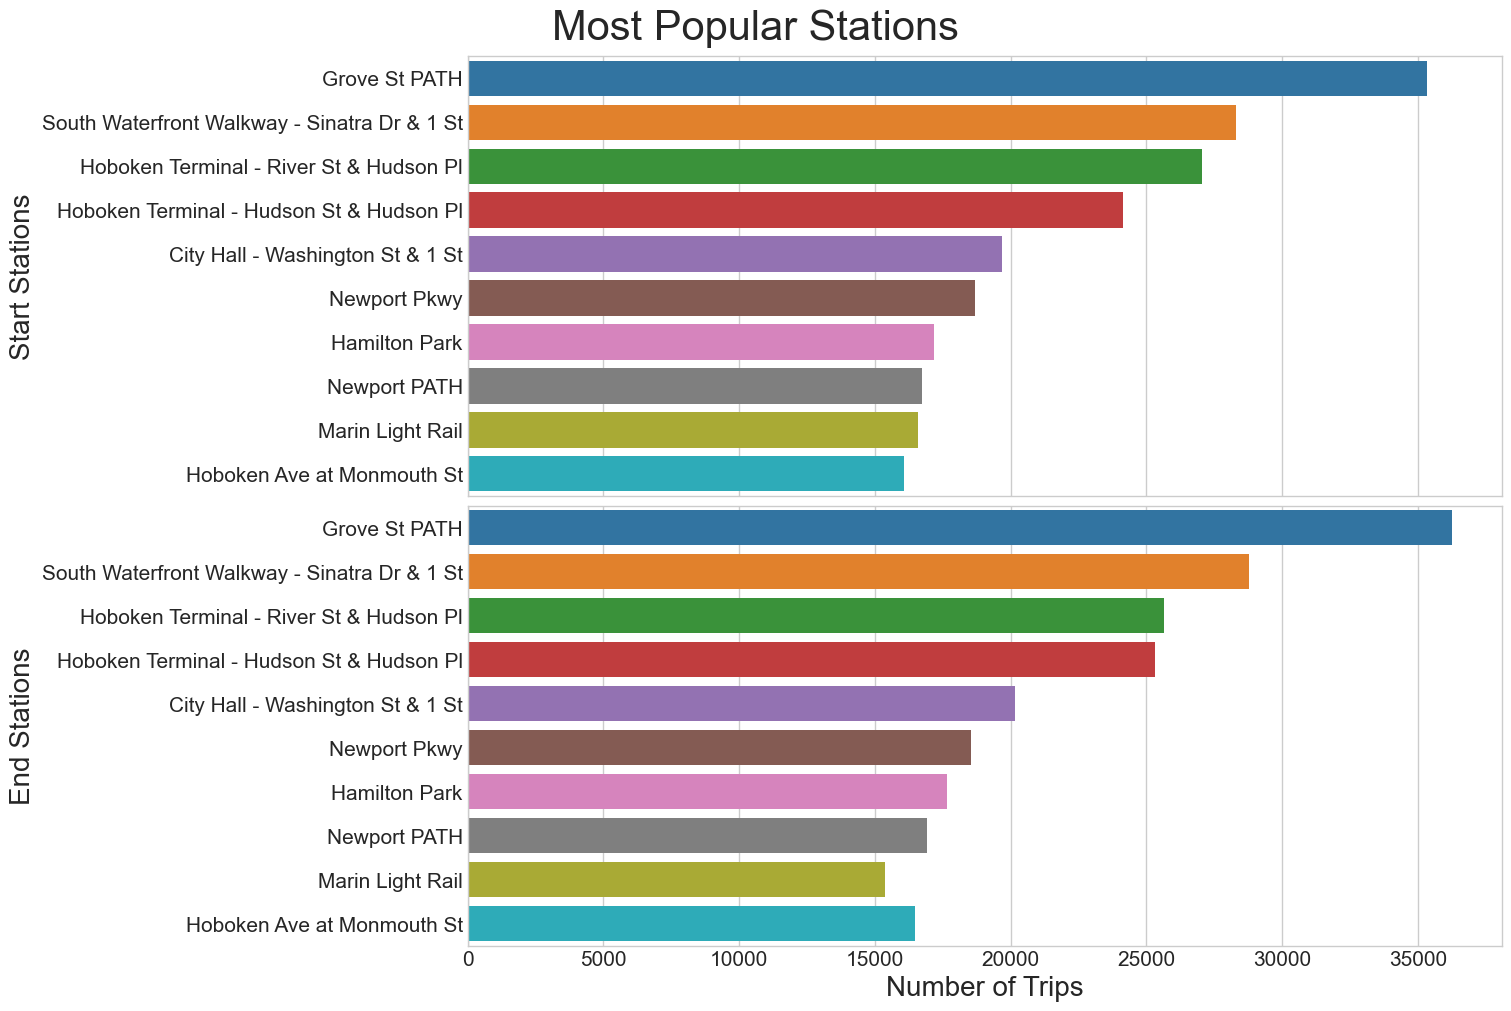

In [69]:
### Station Usage

fig, axs = plt.subplots(2,1, sharex=True, figsize = (15,10))

### Most popular start stations
ax1 = sns.countplot(data=df, y='start_station_name', order=df.value_counts(df['start_station_name']).iloc[:10].index, ax=axs[0])
ax1.set_ylabel("Start Stations", fontsize=20)
ax1.yaxis.set_tick_params(labelsize = 15)
ax1.set(xlabel=None)

### Most popular end stations
ax2 = sns.countplot(data=df, y='end_station_name', order=df.value_counts(df['start_station_name']).iloc[:10].index, ax=axs[1])
ax2.set_ylabel("End Stations", fontsize=20)
ax2.yaxis.set_tick_params(labelsize = 15)
ax2.set_xlabel("Number of Trips", fontsize=20)
ax2.xaxis.set_tick_params(labelsize = 15)

fig.suptitle("Most Popular Stations", fontsize=30)
plt.show()

It appears that the most popular starting and ending stations are about the same, with the small exception of Marin Light Rail and Hoboken Ave at Monmouth St swapping places as the 9th and 10th most popular end stations when compared to their popularity as starting stations.

This similarity between most popular starting and ending stations may suggest that the flow of bikes at these stations should be relative constant as many people are starting and ending their trips here. Therefore, a user should not have an issue finding a bike at one of these stations.

We then decided to visualize where these different stations are located throughout New Jersey so as to see how close the more utilized stations are. To do this, we plotted the starting and ending station utilization on a map.

#### Starting Station Locations

In [70]:
### Start Station Locations
start_jersey_map = folium.Map(location=[df['start_lat'].mean(), df['start_lng'].mean()], zoom_start=14)
grouped_data = df.groupby('start_station_name')['ride_id'].count()

for station_id, num_trips in grouped_data.iteritems():
  # Add a marker for each Citi Bike station to the map, where the size of the marker is proportional to the number of trips starting at the station
  folium.CircleMarker(location=[df[df['start_station_name'] == station_id]['start_lat'].mean(), df[df['start_station_name'] == station_id]['start_lng'].mean()], radius=num_trips/1000, fill=True, color='#3186CC').add_to(start_jersey_map)

start_jersey_map

The stations around Hoboken Terminal and Grove St Path appear to be utilized very heavily. As both of these locations have train stations in addition to Citi Bike stations, we can assume that users are transferring to a train after ending their trip or coming from one to start their trip. This may be because they do not live in the area, or they could be supplementing their commute with Citi Bikes.

#### Ending Station Locations

In [71]:
### End Station Locations
end_jersey_map = folium.Map(location=[df['end_lat'].mean(), df['end_lng'].mean()], zoom_start=14)
end_grouped_data = df.groupby('end_station_name')['ride_id'].count()

for station_id, num_trips in end_grouped_data.iteritems():
  # Add a marker for each Citi Bike station to the map, where the size of the marker is proportional to the number of trips starting at the station
  folium.CircleMarker(location=[df[df['end_station_name'] == station_id]['end_lat'].mean(), df[df['end_station_name'] == station_id]['end_lng'].mean()], radius=num_trips/1000, fill=True, color='#3186CC').add_to(end_jersey_map)

end_jersey_map

KeyboardInterrupt: 

This map is very similar to the starting station population map, with one notable difference being that there are number of stations throughout Manhattan and a few in Brooklyn which appear. This would suggest that a number of users are starting their trip with Citi Bike in New Jersey but ending in a New York station. These users may be using the service for leisurely purposes, or they could be more health conscious commuters who are not afraid of biking a longer distance to work.

### When Do People Use Citi Bike?

The second question we chose to analyze is when users of Citi Bike typically utilize the service.

#### Seasonality

We first grouped the data to obtain a count of how many rides occurred in each season using the `season` column that we created. We wanted to analyze this as New York is a place which experiences 4 distinct seasons which have fluctuating temperatures and weather conditions which may have an impact on how many rides users may take.

In [ ]:
### Create data frame groups rides by the season in which they occurred
df_by_season = df['season'].value_counts().rename_axis('season').reset_index(name='number_of_rides').set_index('season')
df_by_season = df_by_season.reindex(['spring', 'summer', 'fall', 'winter']).reset_index()
df_by_season.head()

,season,number_of_rides
0,spring,157439
1,summer,277313
2,fall,220813
3,winter,83148


From this grouping, we can see that the most rides occur in the summer and the least rides occur in the fall. This makes sense as New York experiences warmer weather in the summer which is conducive to outside activities, like riding a bike. During the winter months, the weather is colder and there is the chance of snow, both of which would not encourage outdoor activities.

We then thought it would be valuable to visualize the change in ridership over the course of the 4 seasons and created a line graph to display this.

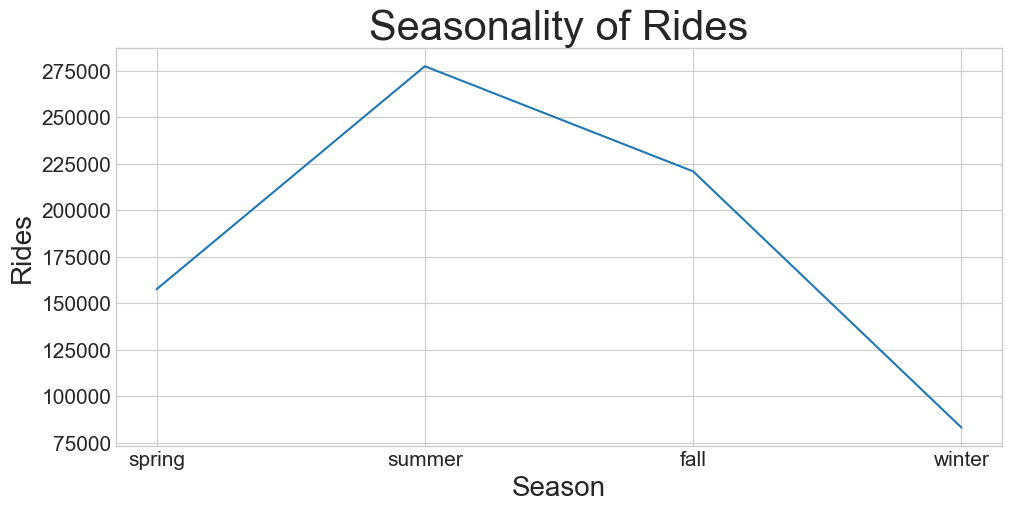

In [ ]:
### Rides by season
fig, axs = plt.subplots(figsize = (10,5))

sns.lineplot(data=df_by_season, x='season', y='number_of_rides', ax=axs)
axs.set_title("Seasonality of Rides", fontsize=30)
axs.set_xlabel('Season', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Rides', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

Ridership appears to grow from spring to summer, and then begin to drop off in the fall and drop even more steeply in the winter. This trend follows the previous assumption that the warmer weather encourages users to ride with Citi Bike and the colder weather may deter users from using the service.

#### Weekly Usage

Next, we wanted to see how the frequency of rides changed throughout the year for each day of the week. In order to visualize this, we first needed to group the data by day of week and week number in the year. Then we could count how many rides were take for each day in each week and aggregate that information.

In [ ]:
### Distribution of usage by day over year

### Create list to store rows
data2 = []

### Iterate through grouped data frames for each day of the week
for day, grp in df.groupby('day_of_week'):
    ### Iterate through rows of the data frame for each day of the week
    for week, wgrp in grp.groupby("week_num"):
        ### Add the day of the week, week number in the year, and number of rows (count) to the list
        data2.append([day, week, wgrp.shape[0]])
### Create a dataframe from the list of lits
df_data2 = pd.DataFrame(data2, columns=['day', 'week', 'ride_count'])

By grouping the data into data frames for each day of the week and each week of the year, we were then able to take the sum of the number of rows in the smaller data frame to determine how many rides were taken.

We used box plots of this data to visualize the distribution of rides by day of the week.

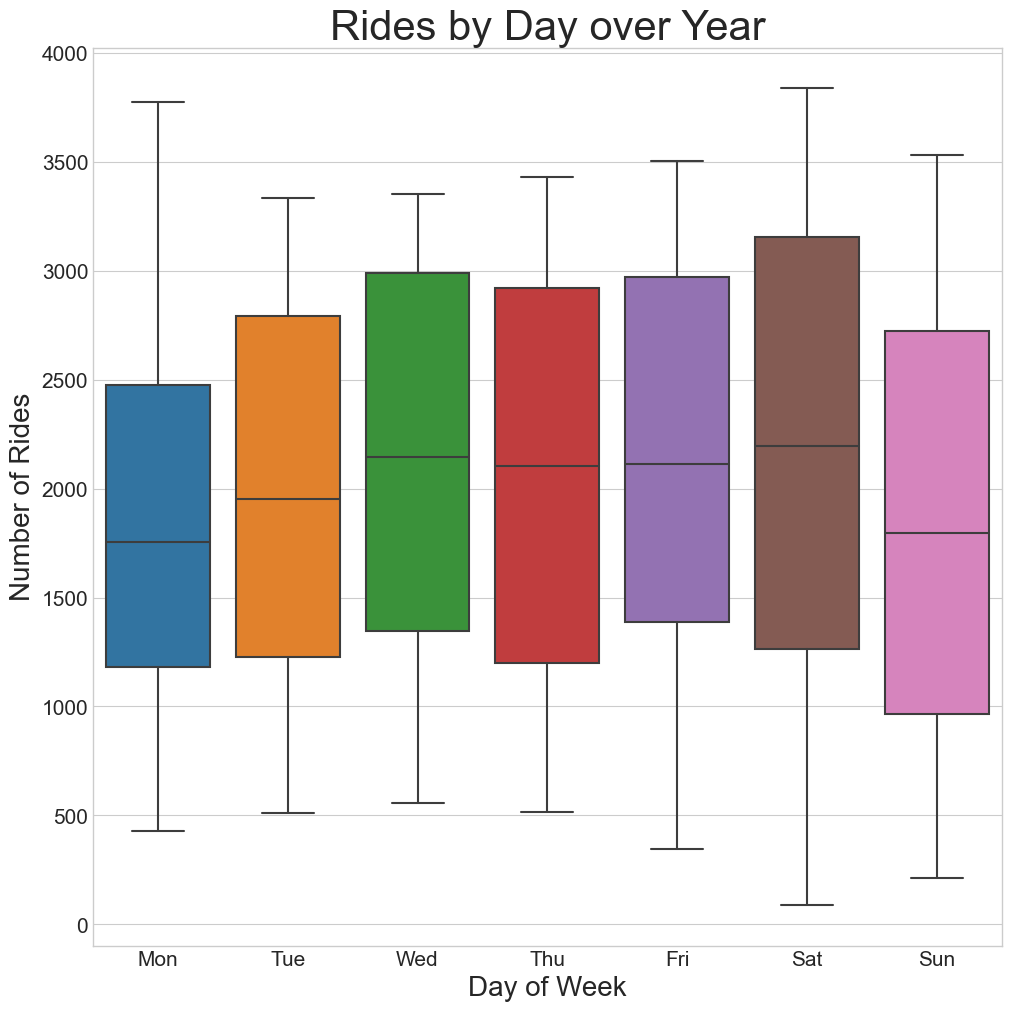

In [ ]:
### Ride count by day of week over year
fig, axs = plt.subplots(figsize = (10,10))

sns.boxplot(data=df_data2, y='ride_count', x='day', ax=axs, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axs.set_title("Rides by Day over Year", fontsize=30)
axs.set_xlabel('Day of Week', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Number of Rides', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

This showed us that some days of the week have more variance in ridership than others. Tuesday - Friday are the least spread as the rides on those days are more likely to represent commuters or users with a regular weekly schedule than leisurely rides. Saturday and Sunday have a greater spread as they likely represent leisurely rides which would vary based on many factors such as weather. Mondays vary the most for weekdays as it's possible that users routines are not as static on Mondays as they are on the rest of the weekdays.

#### Hourly Usage

Finally, we wanted to see how Citi Bike usage changes throughout the day. To do this, we created a pivot table to group the number of rides by day of the week and hour of the day.

In [ ]:
### Group trips by day of week and hour that they started

df_rides_by_hour_day = pd.pivot_table(df[['day_of_week', 'start_hour', 'start_station_name']], index=['day_of_week', 'start_hour'], aggfunc='count')
df_rides_by_hour_day = df_rides_by_hour_day.unstack(level=0).reindex(labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], axis=1, level=1)

morning_hours = ["12 AM"]
afternoon_hours = ["12 PM"]

for hour in range(1, 12):
    morning_hours.append(str(hour) + " AM")
    afternoon_hours.append(str(hour) + " PM")    


After grouping the data, we created labels for each hour in the day to make the visualization more readable.

We used a heatmap to visualize this data so the times when ridership was highest would be more apparent.

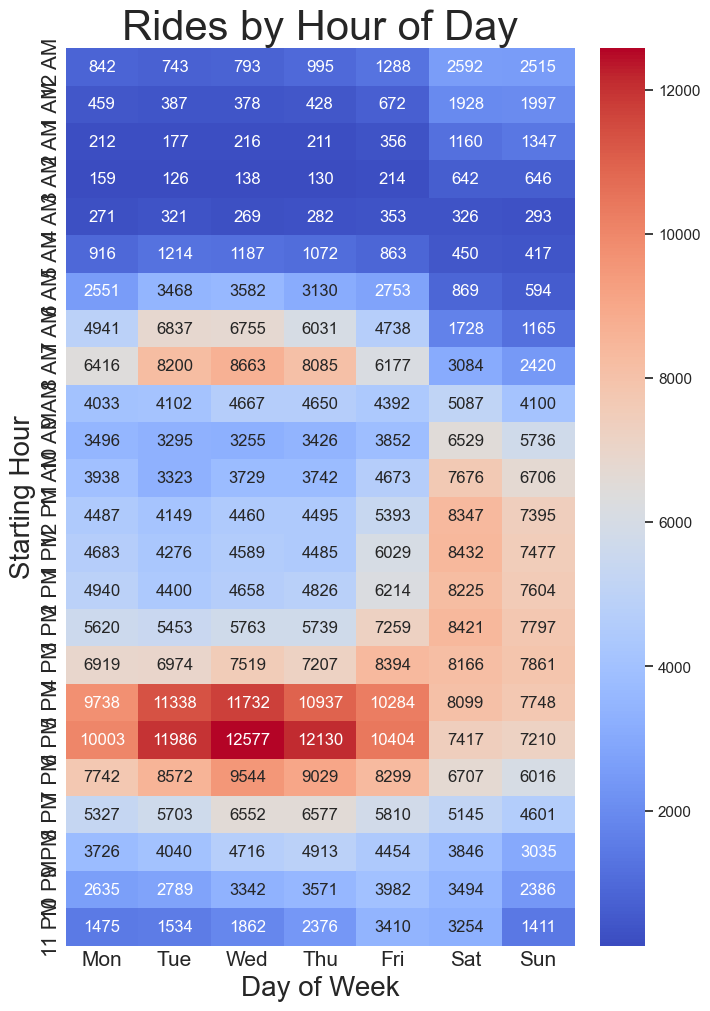

In [ ]:
### Usage by Hour over Week
fig, axs = plt.subplots(figsize = (7,10))

sns.set_context("notebook")
sns.heatmap(df_rides_by_hour_day, cmap = 'coolwarm', annot=True, fmt="d", ax=axs, xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], yticklabels=morning_hours + afternoon_hours)
axs.set_title("Rides by Hour of Day", fontsize=30)
axs.set_xlabel('Day of Week', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Starting Hour', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

On weekdays, the most popular times are the 3 hours of the morning commute from about 7 AM - 9 AM and in the evenings, from 4 PM - 9 PM. One interesting discovery regarding weekdays is that there is significantly more usage of the service in the evening rush hours than in the morning rush hours. This may be due to the weather in the evenings typically being nicer in the evening hours whereas the morning hours can still be less comfortable for example in the summer. It could also be because users would not want to exercise before going to work as they may sweat or get their work clothes dirty. This may be less of a concern in the evening which is why ridership is higher then.

Weekend ridership appears to be most common from 10 AM to 7 PM. This would make sense as this range of hour is usually when most people would be partaking in leisurely activities. The 7 PM slow down is possibly due to daylight hours ending around 7 PM or 8 PM in the summer.

### How Do People Use Citi Bike?

Our third question was to analyze how people use Citi Bike. We did this by analyzing ride duration.

#### Seasonality
Since we already created a box plot to visualize the overall distribution of ride durations, we then wanted to see how seasonality effected ride durations.

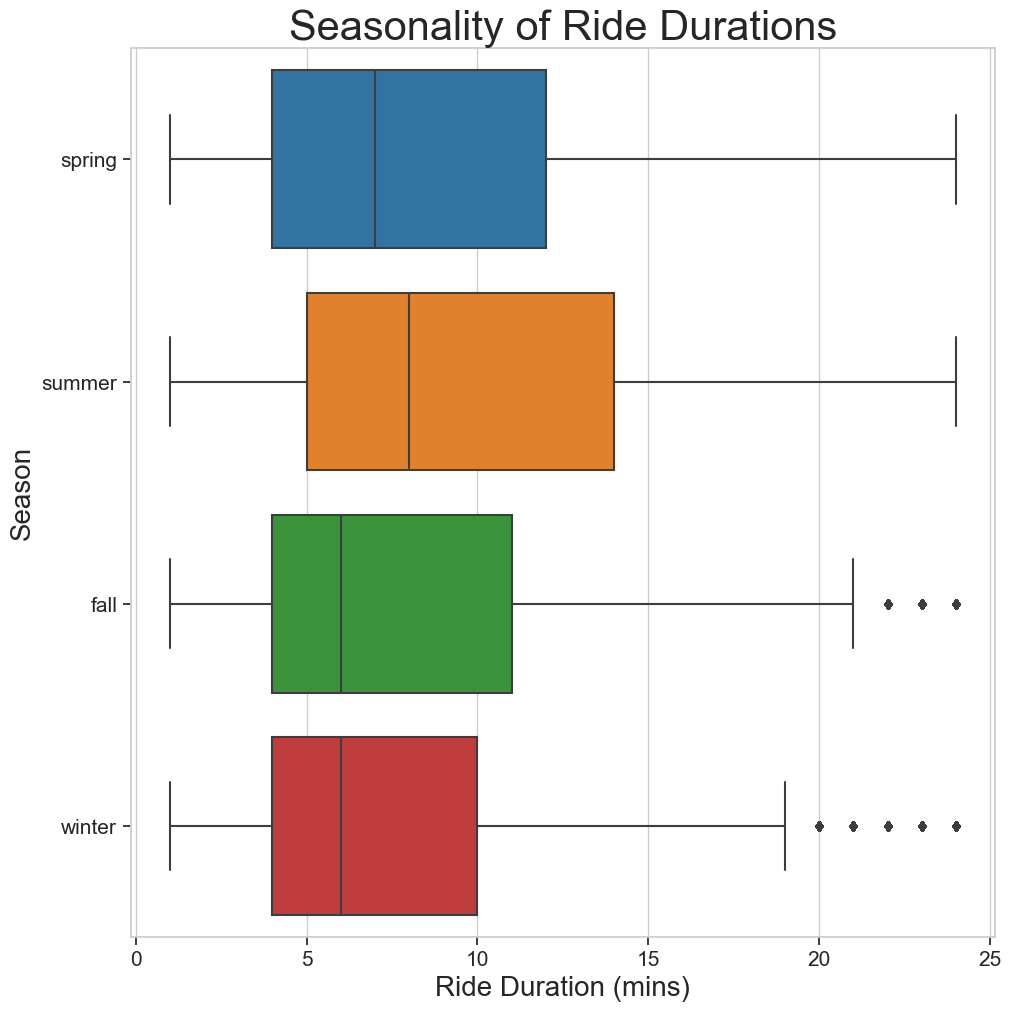

In [ ]:
### Ride duration by season
fig, axs = plt.subplots(figsize = (10,10))

sns.boxplot(data=df, y='season', x='ride_duration_mins', ax=axs, order=['spring', 'summer', 'fall', 'winter'])
axs.set_title("Seasonality of Ride Durations", fontsize=30)
axs.set_xlabel('Ride Duration (mins)', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Season', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

The trend observed in ride frequency appears to also apply to ride durations. Rides were generally longer in the summer with spring having the next longest median ride duration. Winter and fall appear to have the same median ride duration, but the spread in fall was a bit greater.

This trend may be influenced by the weather and number of hours of daylight as noted previously. The longer length of rides in the summer may also be explained by more users using the bikes for leisurely trips which may be longer in duration as opposed to someone using it for a commute. In addition, more tourists to the city in the summer months may contribute to longer ride lengths as they would be using it exclusively for leisure being that they are visiting.

The similarity in distribution of rides in fall or winter may indicate that more users in those seasons are commuters which is why the ride duration would vary less as a user's commute would typically not change very much unless it was impacted by outside factors such as traffic. 

Ride duration in the spring being more similarly distributed to summer may be explained by the nicer weather, but also by the use case beginning to shift from being more commuters to more leisure riders.

#### Weekday vs. Weekend

Next, we wanted to see what the distribution of rides by weekday (_Monday, Tuesday, Wednesday, Thursday, Friday_) vs. weekend (_Saturday, Sunday_) looked like.

To do this, we grouped the rides by the `weekday_weekend` column we created.

In [ ]:
### Group rides by whether they started on a weekday or weekend
df_by_weekday_weekend = df['weekday_weekend'].value_counts().rename_axis('weekday_weekend').reset_index(name='counts')
df.shape

(738713, 16)

This allowed us to then visualize the data in a pie chart.

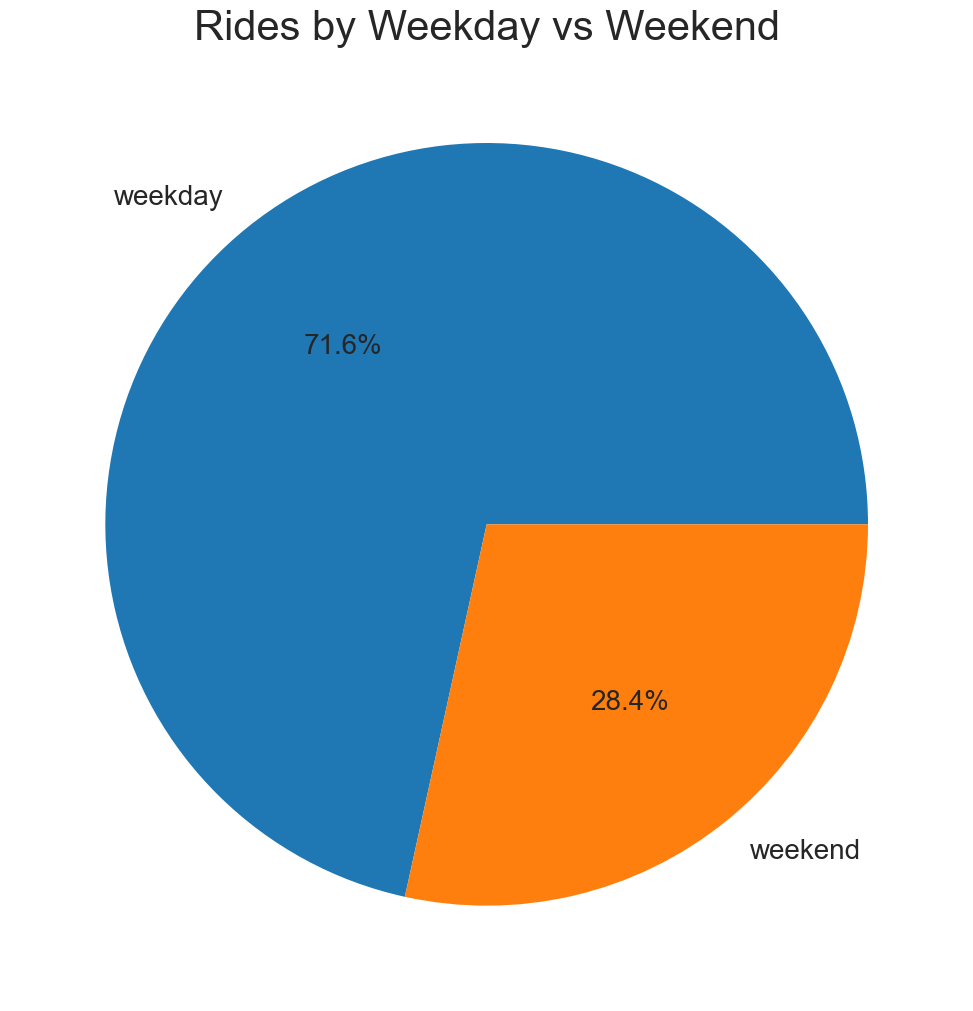

In [ ]:
### Usage by weekday vs weekend
fig, axs = plt.subplots(figsize = (10,10))

axs.pie(df_by_weekday_weekend['counts'], labels=df_by_weekday_weekend['weekday_weekend'], autopct='%1.1f%%', textprops={'fontsize': 20})
axs.set_title("Rides by Weekday vs Weekend", fontsize=30)

plt.show()

About 72% of users are riding on the weekday and only 28% are using Citi Bike on the weekend. This may suggest that more users are using it as part of their daily commute than for leisure on the weekend.

We wanted to see how the ride duration was distributed by weekdays vs. weekends to see if it supported our assumption.

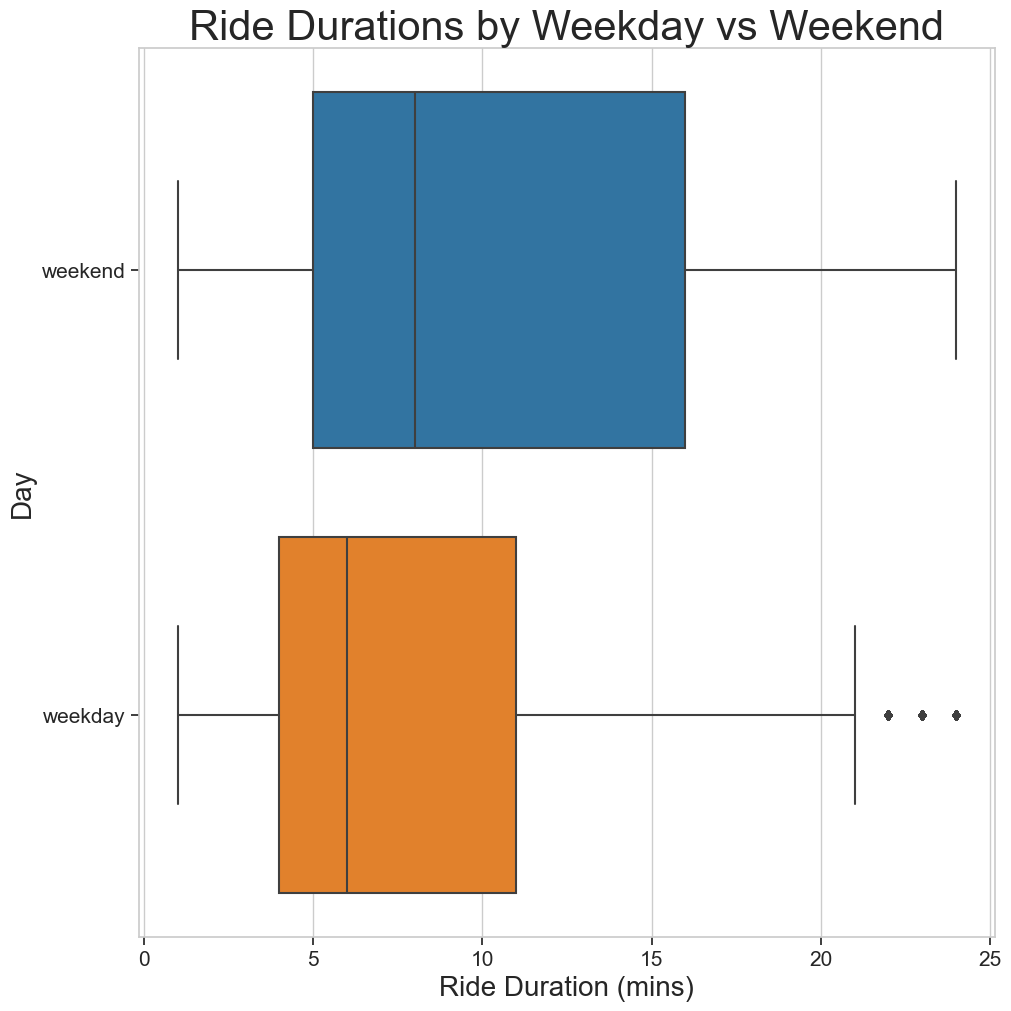

In [ ]:
### Ride duration by season
fig, axs = plt.subplots(figsize = (10,10))

sns.boxplot(data=df, y='weekday_weekend', x='ride_duration_mins', ax=axs)
axs.set_title("Ride Durations by Weekday vs Weekend", fontsize=30)
axs.set_xlabel('Ride Duration (mins)', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('Day', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

While more users are riding on the weekdays, it appears that they ride for shorter periods of time during the week. This may support our assumption that during the week Citi Bike users are more likely to be using the service as part of their commute to work than for leisurely experiences. Rides on the weekend appear to be longer which would also support our assumption that the weekend rides are more for leisure.

Given that there are more riders on the weekdays than weekend, it may suggest that Citi Bikes are used more by natives for their commute to work than by tourists on the weekends.

### Who Uses Citi Bike?

Our final question was to analyze the breakdown of members vs non members who use the service. A non member would be charged \$3.99 for the first 30 minutes of their ride and an additional \$0.23/min afterwards. By paying the \$15.42/month membership fee, the first 45 minutes of the ride are free and each additional minute is \$0.15/min which was capped at $3 in additional per minute fees.

#### Rides by User Type

We first grouped the rides into two categories: rides by members and rides by non members which in the dataset were labeled as _casual_ users.

In [ ]:
### Group users by whether they are a member or non member
df_by_season = df['member_casual'].value_counts().rename_axis('membership_type').reset_index(name='counts')

After grouping the data, we wanted to visualize it in a pie chart to see the breakdown.

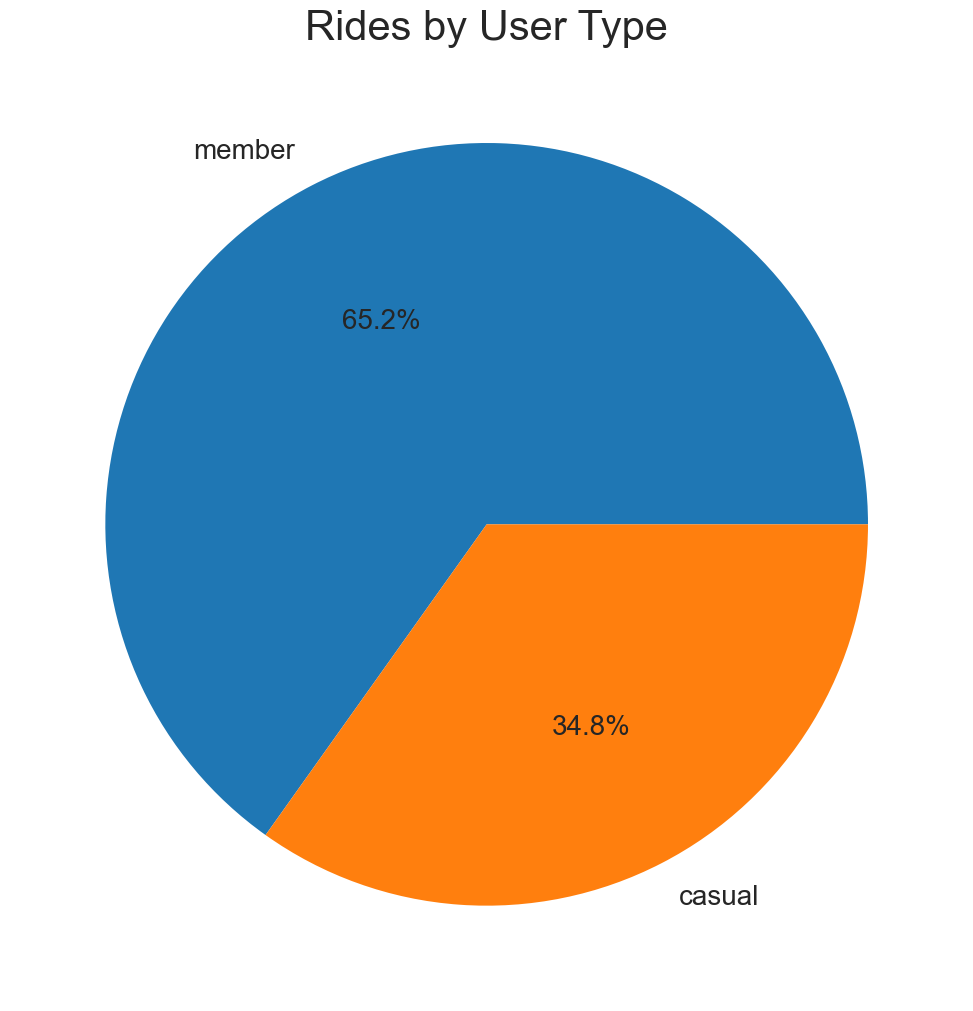

In [ ]:
### Usage by user type (member vs. non member)
fig, axs = plt.subplots(figsize = (10,10))

axs.pie(df_by_season['counts'], labels=df_by_season['membership_type'], autopct='%1.1f%%', textprops={'fontsize': 20})
axs.set_title("Rides by User Type", fontsize=30)

plt.show()

It appears that a majority of the riders are members. Given that the monthly membership fee pays for itself in about 4 rides (_\$15.42 per month/ \$3.99 per ride = 3.86 rides/month_), it is more likely that members are commuters as they would be riding on average about 40 times per month (_2 times per day * 5 days per week * 4 weeks per month_). The casual riders are more likely to be using Citi Bikes less than 4 times per month which may suggest that they are visiting the area or just using it a few times per month for leisure.

#### Ride Duration by User Type

The last part of our analysis was to examine the duration of rides by each type of user. We did this by creating a box plot.

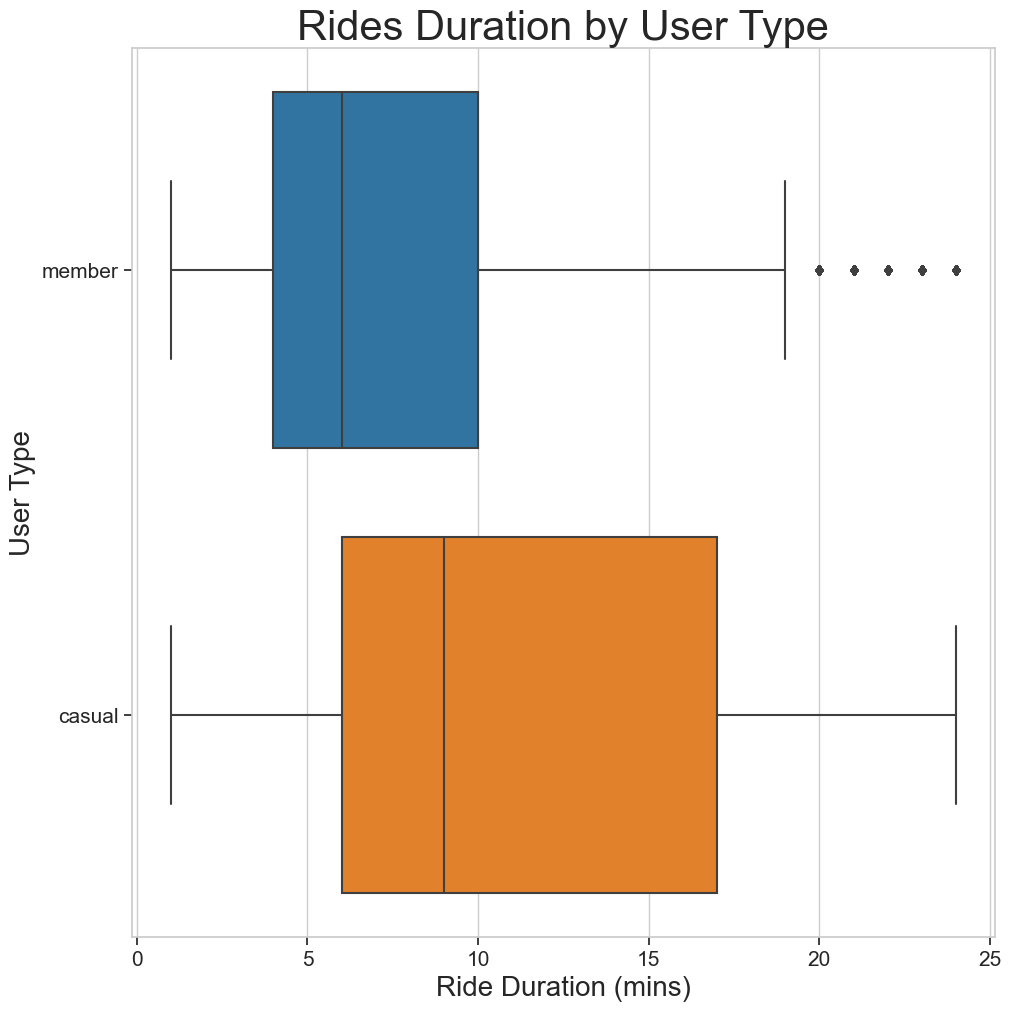

In [ ]:
### Ride duration by user type

fig, axs = plt.subplots(figsize = (10,10))

sns.boxplot(data=df, y='member_casual', x='ride_duration_mins', order=['member', 'casual'], ax=axs)
axs.set_title("Rides Duration by User Type", fontsize=30)
axs.set_xlabel('Ride Duration (mins)', fontsize=20)
axs.xaxis.set_tick_params(labelsize = 15)
axs.set_ylabel('User Type', fontsize=20)
axs.yaxis.set_tick_params(labelsize = 15)

plt.show()

Members tend to have shorter rides than non members. This also supports our assumption that most members use the service for commuting and more non members may use the service for leisure.

## Conclusion
Based on our analysis, it appears that Citi Bikes are typically used for business more than pleasure.
* The busiest bike stations are ones near train stations which will allow commuters access to New York City or other parts of New Jersey.
* Usage is most popular during the morning and evening rush hour, but especially the evening. There are also more users in the summer when the weather is typically warmer and it is more pleasant to be outside.
* Riders are using Citi Bikes more during the week than on the weekend, and there are more members using the service than non members.

While this suggests more users are using Citi Bikes for business, About one-third of Citi Bike usage does appear to be for leisurely purposes. It may be the case that this usage helps Citi Bike on weekends in the spring and summer, but the true heroes are the commuters braving the elements to continue to patron Citi Bike in the colder winter months.

## Challenges

### Volume of the data
We originally planned on doing a Citi Bike analysis for both New York City and Jersey City for the period of 2019 to 2022. However, the dataset contained over 30 million rows which caused an issue with storing the data with the resources we utilized. 

### Changes in data format
We quickly realize that there was a change in the number of features in the data between the year of 2020 and 2021. This change would limit the analysis we could do with data from different years as the missing features would need to be excluded from some of the analysis. More time would need to be spent accounting for the missing values.

### Limited Dataset
Some of the features that were removed from the old dataset were ones that we used in our analysis. These features therefore had to be created from the available data.


## Lessons Learned
* We discovered that cursory data analysis is important to understand if the quantity of data being analyzed is appropriate for the analysis.

* We realized that seaborn was better for quickly visualizing our data to ensure more time was being spent on the analysis than building our visualizations.

* We learned that each visualization needed to serve a purpose in supporting the analytical question and not simply presenting the data in a different format.

## Question for Further Analysis
* Can a user be advised on whether or not they as an individual should become a member? This would require additional fields in the data such as a member ID so rides could be connected to unique users.

* What impact does traffic have on ride duration at different times? Additional information on speed and routes traveled would be needed as well as traffic data for the time periods analyzed.

* Do more residents use the service or tourists to the area? In order to analyze this, Citi Bike would need to capture address information of their users. This may be included in payment information Citi Bike collects, but it was not available in the data set.